In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#EDA on w2p output file
df = pd.read_csv("processed_final.csv")

In [3]:
print(df.shape)
print(df.columns)

(33594, 89)
Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff',
       'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius',
       'tce_sradius_err', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 

In [4]:
print(df.describe())

              kepid  tce_plnt_num  tce_rogue_flag    tce_period  \
count  3.359400e+04  33594.000000    33594.000000  33594.000000   
mean   7.605097e+06      2.218878        0.043936    146.113689   
std    2.650102e+06      1.788788        0.204957    189.889199   
min    7.570990e+05      1.000000        0.000000      0.500309   
25%    5.599974e+06      1.000000        0.000000      2.208535   
50%    7.825899e+06      1.000000        0.000000     26.527750   
75%    9.641031e+06      3.000000        0.000000    311.727000   
max    1.000016e+08     10.000000        1.000000    726.678000   

       tce_period_err   tce_time0bk  tce_time0bk_err    tce_impact  \
count    3.359400e+04  33594.000000     3.359400e+04  33594.000000   
mean     6.218979e+01    192.208167     1.003057e+03      0.703958   
std      9.062233e+03     96.656096     8.814472e+04      0.292341   
min     -1.000000e+00    131.502000    -1.000000e+00      0.000006   
25%      1.346542e-05    132.395250     2.5915

In [7]:
new_df = df[['kepid','tce_plnt_num','tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
            'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set', 'av_pred_class',
            'w2p_score','w2p_disposition', 'av_disposition','koi_disposition','koi_pdisposition']]

In [8]:
print(new_df.isnull().sum())

kepid                   0
tce_plnt_num            0
tce_period              0
tce_duration            0
koi_score               0
koi_period          25381
av_vf_pc                0
av_vf_pc_err        18015
av_vf_afp           18015
av_vf_afp_err       18015
av_vf_ntp           18015
av_vf_ntp_err       18015
av_pp_pc            18015
av_pp_afp           18015
av_pp_ntp           18015
av_training_set         0
av_pred_class       18015
w2p_score               0
w2p_disposition         0
av_disposition          0
koi_disposition         0
koi_pdisposition        0
dtype: int64


AFP = astrophysical false positive (not planet)

NTP = nontransiting phenomenon (not planet)

In [9]:
print(new_df.describe())

              kepid  tce_plnt_num    tce_period  tce_duration     koi_score  \
count  3.359400e+04  33594.000000  33594.000000  33594.000000  33594.000000   
mean   7.605097e+06      2.218878    146.113689      0.341025      0.114806   
std    2.650102e+06      1.788788    189.889199      0.399765      0.310408   
min    7.570990e+05      1.000000      0.500309      0.020846      0.000000   
25%    5.599974e+06      1.000000      2.208535      0.121208      0.000000   
50%    7.825899e+06      1.000000     26.527750      0.208333      0.000000   
75%    9.641031e+06      3.000000    311.727000      0.419167      0.000000   
max    1.000016e+08     10.000000    726.678000      9.891667      1.000000   

        koi_period      av_vf_pc  av_vf_pc_err     av_vf_afp  av_vf_afp_err  \
count  8213.000000  33594.000000  15579.000000  15579.000000   15579.000000   
mean     41.424709      0.115105      0.072002     52.345730       0.112909   
std     100.326357      0.286902      0.068805     

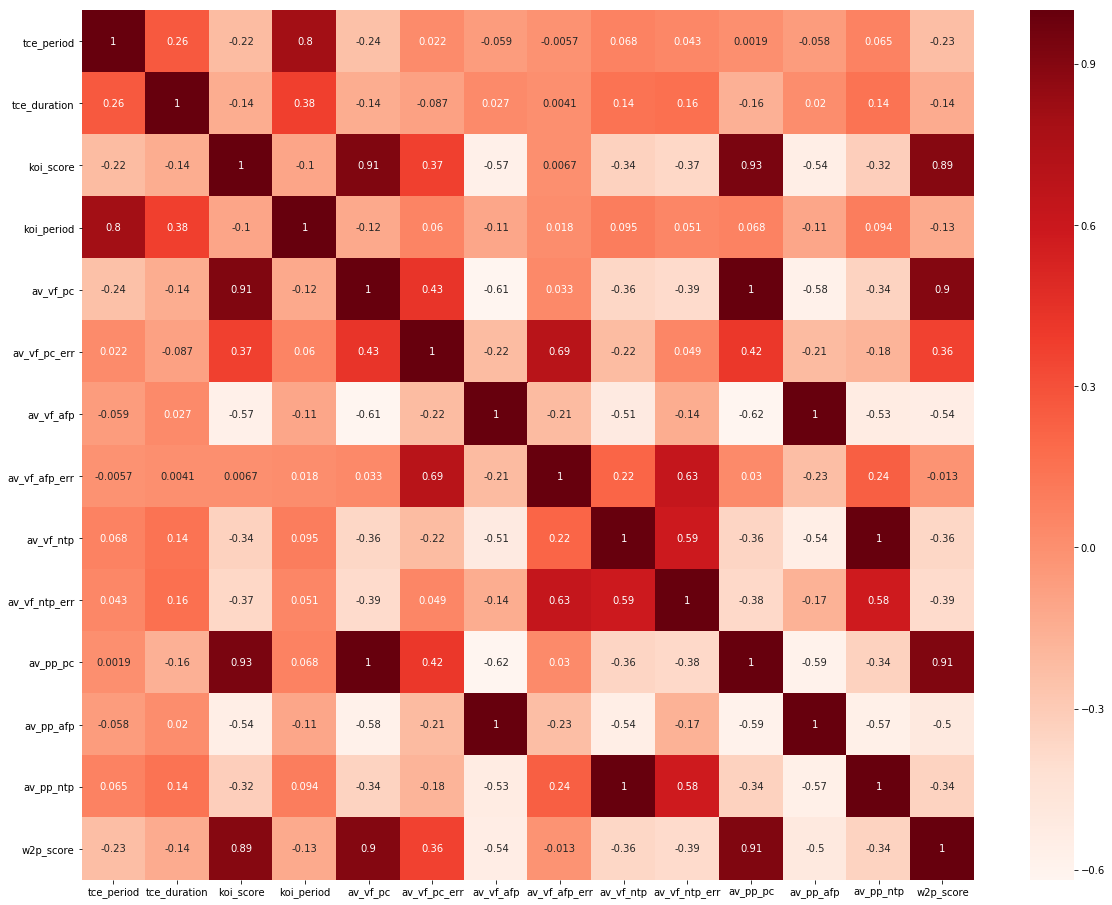

In [11]:
# corr matrix
new_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'w2p_score']].corr()

# plot the correlation matrix
sns.heatmap(new_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
                    'w2p_score']].corr(), annot=True, cmap = 'Reds')
plt.rcParams['figure.figsize'] = [20, 16]
plt.show()

Text(0.5, 1.0, 'W2P Score vs Koi Score')

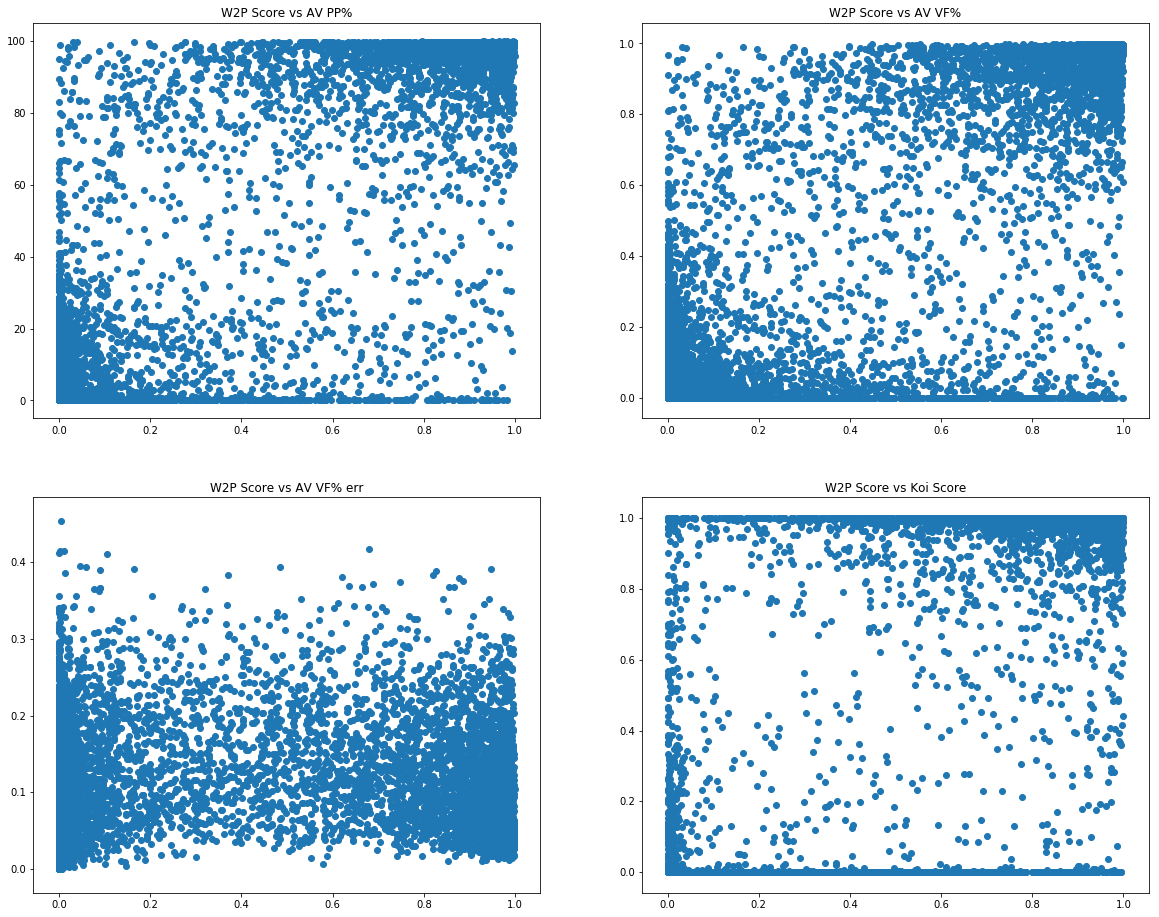

In [12]:
# scatter plots
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(new_df.w2p_score,new_df.av_pp_pc)
axs[0, 0].set_title('W2P Score vs AV PP%')
axs[0, 1].scatter(new_df.w2p_score,new_df.av_vf_pc)
axs[0, 1].set_title('W2P Score vs AV VF%')
axs[1, 0].scatter(new_df.w2p_score,new_df.av_vf_pc_err)
axs[1, 0].set_title('W2P Score vs AV VF% err')
axs[1, 1].scatter(new_df.w2p_score,new_df.koi_score)
axs[1, 1].set_title('W2P Score vs Koi Score')

In [13]:
new_df.head(10)

,kepid,tce_plnt_num,tce_period,tce_duration,koi_score,koi_period,av_vf_pc,av_vf_pc_err,av_vf_afp,av_vf_afp_err,...,av_pp_pc,av_pp_afp,av_pp_ntp,av_training_set,av_pred_class,w2p_score,w2p_disposition,av_disposition,koi_disposition,koi_pdisposition
0,2304168,2,431.719000,0.550833,0.000,NaN,0.000989,0.0164,93.8540,0.0937,...,0.0000,98.1642,1.8358,PC,AFP,0.002920,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
1,2304235,1,0.570607,0.048333,0.000,NaN,0.003903,0.0258,92.9856,0.1562,...,0.0014,97.8872,2.1114,PC,AFP,0.000323,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
2,2304566,1,0.689480,0.218167,0.000,NaN,0.005657,0.0319,16.8392,0.1671,...,0.1320,4.7366,95.1314,PC,NTP,0.000015,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
3,2304320,1,16.540800,0.113125,0.998,16.540814,0.978503,0.1031,2.1087,0.1014,...,99.3628,0.6372,0.0000,PC,PC,0.979005,CONFIRMED,CONFIRMED,CONFIRMED,CANDIDATE
4,2303365,2,0.520697,0.043125,0.000,NaN,0.000000,0.0000,99.9029,0.0128,...,0.0000,99.9245,0.0755,PC,AFP,0.000623,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
5,2303102,10,480.481000,0.648333,0.000,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,PC,NaN,0.000886,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
6,2303903,1,3.708560,0.086375,0.800,3.708586,0.729000,0.2174,21.3818,0.1319,...,78.8437,12.4173,8.7390,PC,PC,0.878940,CONFIRMED,CONFIRMED,CONFIRMED,CANDIDATE
7,2303365,1,0.520693,0.021117,0.000,NaN,0.000032,0.0028,99.7889,0.0164,...,0.0000,99.9322,0.0678,PC,AFP,0.002047,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
8,2304604,1,0.845263,0.097292,0.000,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,PC,NaN,0.001618,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
9,2305255,1,24.569400,1.298750,0.000,24.571487,0.181874,0.2370,27.0973,0.2963,...,15.3472,16.7615,67.8913,PC,NTP,0.008195,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE


In [14]:
w2p_conf_df=new_df[new_df.w2p_disposition=='CONFIRMED']
av_conf_df=new_df[new_df.av_disposition=='CONFIRMED']
koi_conf_df=new_df[new_df.koi_disposition=='CONFIRMED']

In [15]:
print(w2p_conf_df.shape)
print(av_conf_df.shape)
print(koi_conf_df.shape)

(3817, 22)
(3761, 22)
(4197, 22)


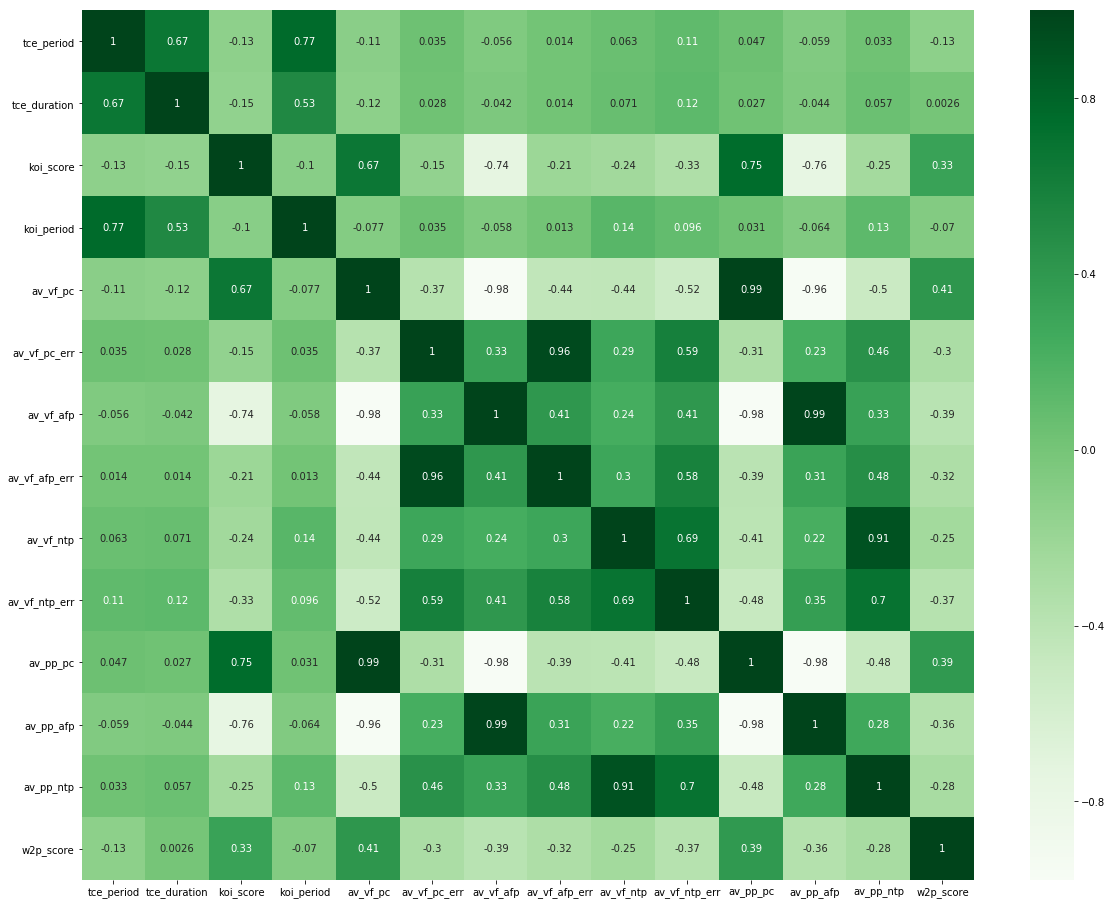

In [18]:
# Corr Matrices of Just the confirmed w2p vs AV vs Koi
# w2p
w2p_conf_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score','w2p_disposition', 'av_disposition']].corr()

# plot the correlation matrix
sns.heatmap(w2p_conf_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score','w2p_disposition', 'av_disposition']].corr(), annot=True, cmap = 'Greens')
plt.rcParams['figure.figsize'] = [20, 16]
plt.show()

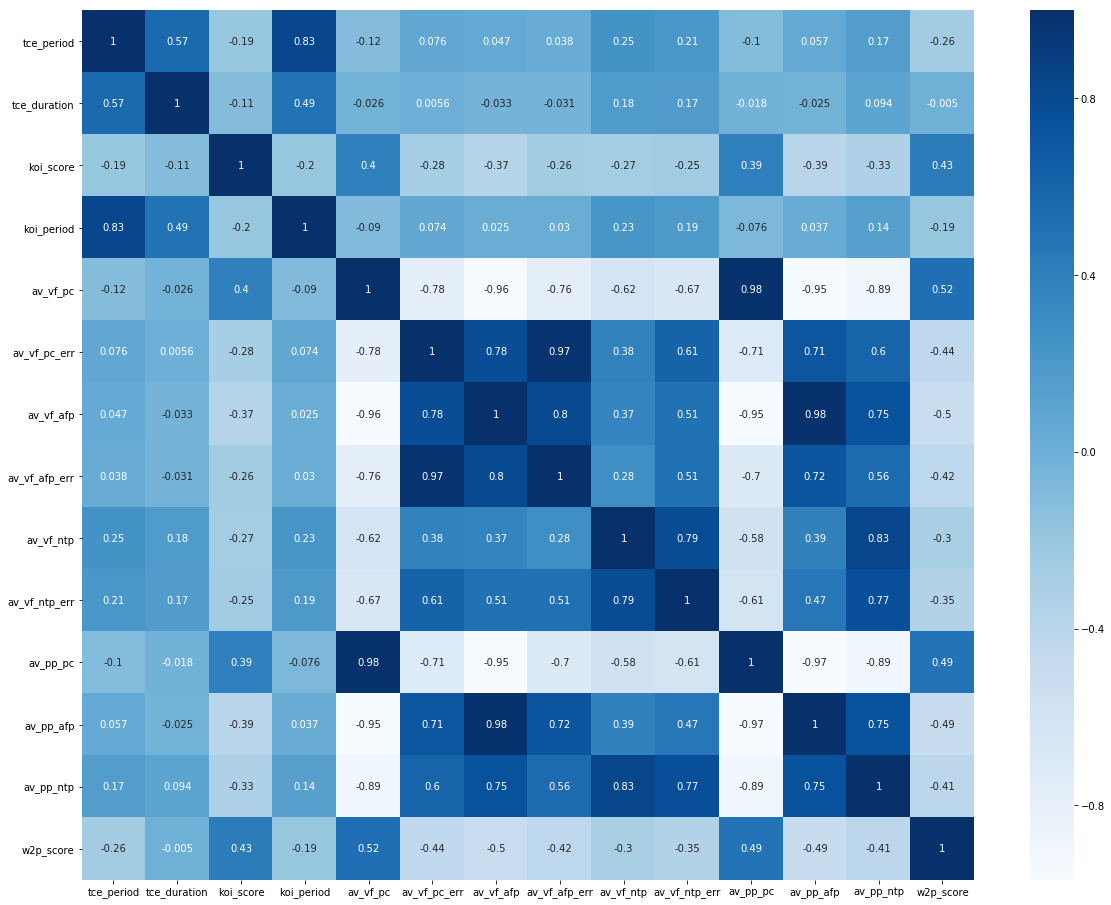

In [19]:
# AV
av_conf_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score','w2p_disposition', 'av_disposition']].corr()

# plot the correlation matrix
sns.heatmap(av_conf_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score','w2p_disposition', 'av_disposition']].corr(), annot=True, cmap = 'Blues')
plt.rcParams['figure.figsize'] = [20, 16]
plt.show()

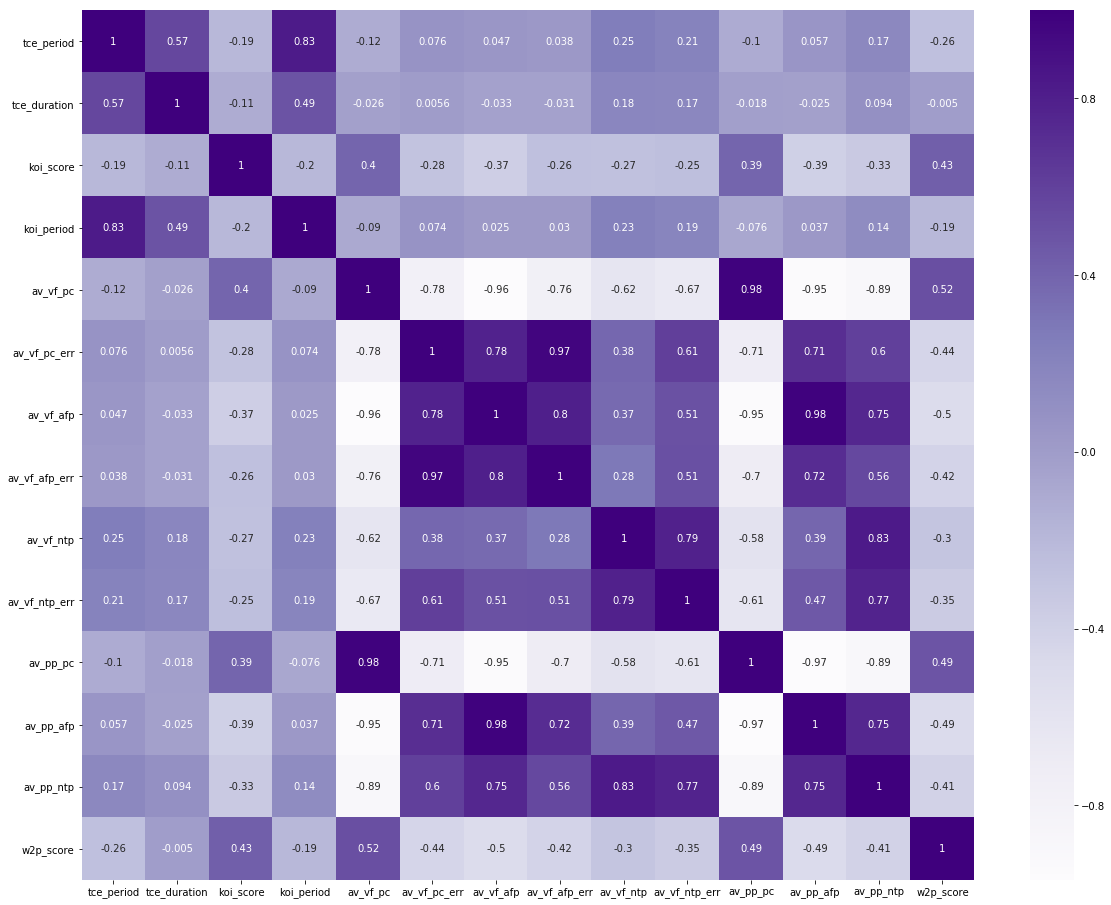

In [20]:
# KOI
av_conf_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score','w2p_disposition', 'av_disposition']].corr()

# plot the correlation matrix
sns.heatmap(av_conf_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score','w2p_disposition', 'av_disposition']].corr(), annot=True, cmap = 'Purples')
plt.rcParams['figure.figsize'] = [20, 16]
plt.show()

In [21]:
print(w2p_conf_df.describe())
print(av_conf_df.describe())
print(koi_conf_df.describe())

              kepid  tce_plnt_num   tce_period  tce_duration    koi_score  \
count  3.817000e+03   3817.000000  3817.000000   3817.000000  3817.000000   
mean   7.871445e+06      1.376212    28.572874      0.190978     0.864278   
std    2.656274e+06      0.751616    54.713469      0.150774     0.301242   
min    7.574500e+05      1.000000     0.524177      0.021592     0.000000   
25%    5.866724e+06      1.000000     5.263420      0.106417     0.950000   
50%    8.127586e+06      1.000000    10.854100      0.152458     0.998000   
75%    9.995771e+06      2.000000    25.563800      0.230000     1.000000   
max    1.288521e+07      7.000000   670.507000      2.788333     1.000000   

        koi_period     av_vf_pc  av_vf_pc_err    av_vf_afp  av_vf_afp_err  \
count  3773.000000  3817.000000   3607.000000  3607.000000    3607.000000   
mean     27.949730     0.809535      0.113227    12.558256       0.110436   
std      60.641221     0.300544      0.069770    21.778817       0.068312  

In [22]:
diff_df=w2p_conf_df[w2p_conf_df.av_disposition=="FALSE POSITIVE"]
diff2_df=w2p_conf_df[w2p_conf_df.koi_disposition=="FALSE POSITIVE"]

In [23]:
print(diff_df.shape)
print(diff2_df.shape)

(524, 22)
(326, 22)


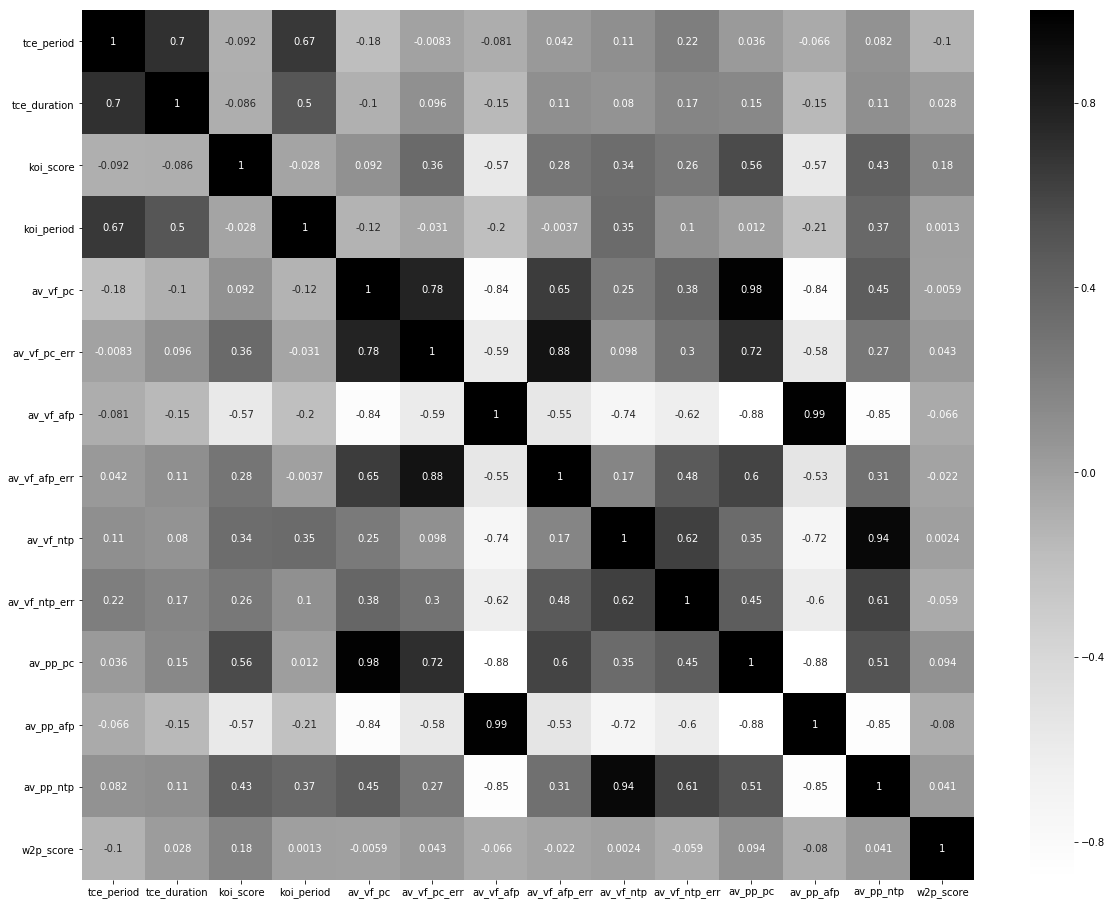

In [24]:
diff_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score']].corr()

# plot the correlation matrix
sns.heatmap(diff_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score']].corr(), annot=True, cmap = 'Greys')
plt.rcParams['figure.figsize'] = [20, 16]
plt.show()

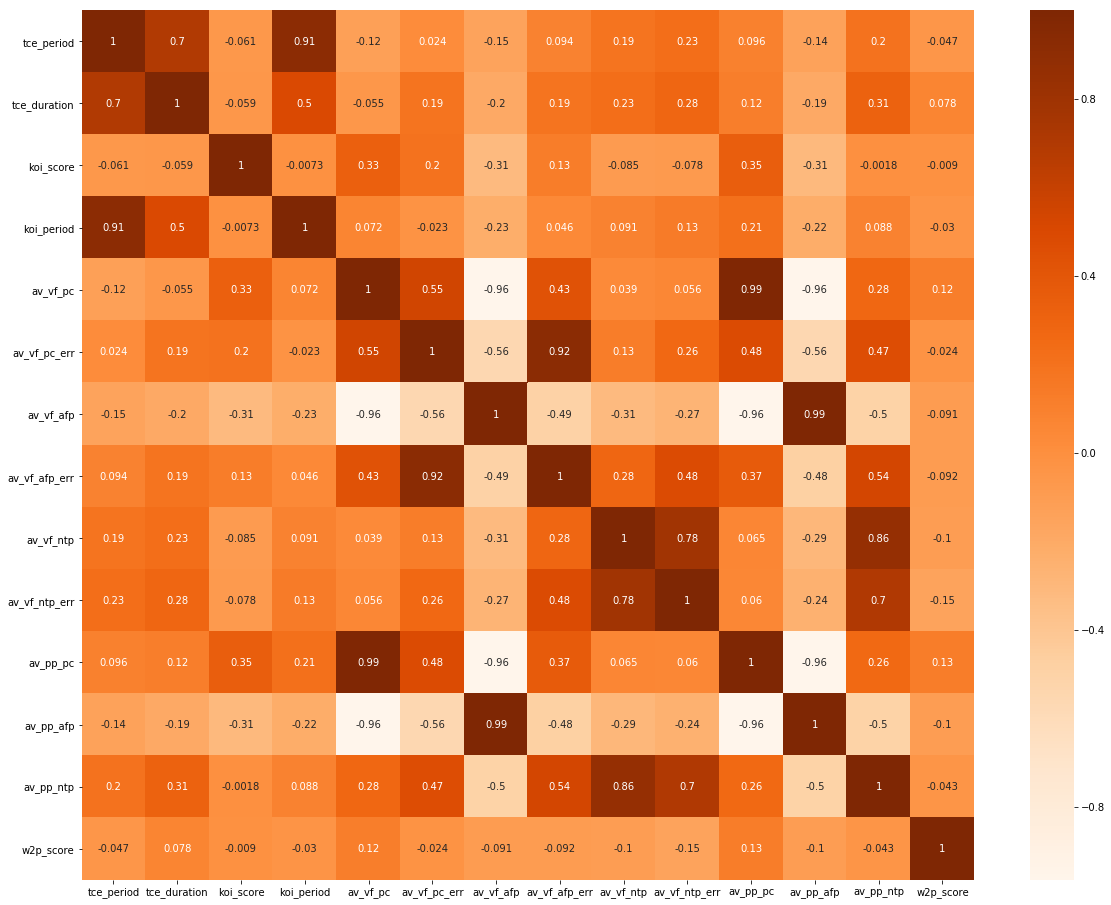

In [25]:
diff2_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score']].corr()

# plot the correlation matrix
sns.heatmap(diff2_df[['tce_period','tce_duration','koi_score','koi_period','av_vf_pc','av_vf_pc_err','av_vf_afp',
        'av_vf_afp_err','av_vf_ntp','av_vf_ntp_err','av_pp_pc', 'av_pp_afp','av_pp_ntp', 'av_training_set',
        'av_pred_class','w2p_score']].corr(), annot=True, cmap = 'Oranges')
plt.rcParams['figure.figsize'] = [20, 16]
plt.show()

In [26]:
diff_df.head()

,kepid,tce_plnt_num,tce_period,tce_duration,koi_score,koi_period,av_vf_pc,av_vf_pc_err,av_vf_afp,av_vf_afp_err,...,av_pp_pc,av_pp_afp,av_pp_ntp,av_training_set,av_pred_class,w2p_score,w2p_disposition,av_disposition,koi_disposition,koi_pdisposition
17,892772,1,5.09259,0.151750,0.000,5.092465,0.010105,0.0400,98.7528,0.0509,...,0.0209,99.9027,0.0765,PC,AFP,0.755189,CONFIRMED,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
101,1434395,1,2.22272,0.118583,0.014,2.222729,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,PC,NaN,0.636106,CONFIRMED,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
138,1572948,1,3.00328,0.090000,0.000,3.003180,0.039525,0.1094,95.0389,0.1265,...,0.0861,99.6177,0.2962,PC,AFP,0.622287,CONFIRMED,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE
236,1865864,1,69.08920,0.257375,0.523,69.089357,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,PC,NaN,0.678977,CONFIRMED,FALSE POSITIVE,CONFIRMED,CANDIDATE
288,2014991,1,6.49680,0.106167,0.000,6.496769,0.051985,0.0897,94.1411,0.0860,...,0.2480,99.3518,0.4002,PC,AFP,0.826148,CONFIRMED,FALSE POSITIVE,FALSE POSITIVE,FALSE POSITIVE


In [31]:
nodiff_df=w2p_conf_df[w2p_conf_df.av_disposition=="CONFIRMED"]
print(nodiff_df.shape)
nodiff2_df=w2p_conf_df[w2p_conf_df.koi_disposition=="CONFIRMED"]
print(nodiff2_df.shape)

(3293, 22)
(3491, 22)


In [32]:
print(diff_df.isnull().sum())
print('')
print(nodiff_df.isnull().sum())
print('')
print(diff2_df.isnull().sum())
print('')
print(nodiff2_df.isnull().sum())

kepid                 0
tce_plnt_num          0
tce_period            0
tce_duration          0
koi_score             0
koi_period           43
av_vf_pc              0
av_vf_pc_err        210
av_vf_afp           210
av_vf_afp_err       210
av_vf_ntp           210
av_vf_ntp_err       210
av_pp_pc            210
av_pp_afp           210
av_pp_ntp           210
av_training_set       0
av_pred_class       210
w2p_score             0
w2p_disposition       0
av_disposition        0
koi_disposition       0
koi_pdisposition      0
dtype: int64

kepid               0
tce_plnt_num        0
tce_period          0
tce_duration        0
koi_score           0
koi_period          1
av_vf_pc            0
av_vf_pc_err        0
av_vf_afp           0
av_vf_afp_err       0
av_vf_ntp           0
av_vf_ntp_err       0
av_pp_pc            0
av_pp_afp           0
av_pp_ntp           0
av_training_set     0
av_pred_class       0
w2p_score           0
w2p_disposition     0
av_disposition      0
koi_disposition   

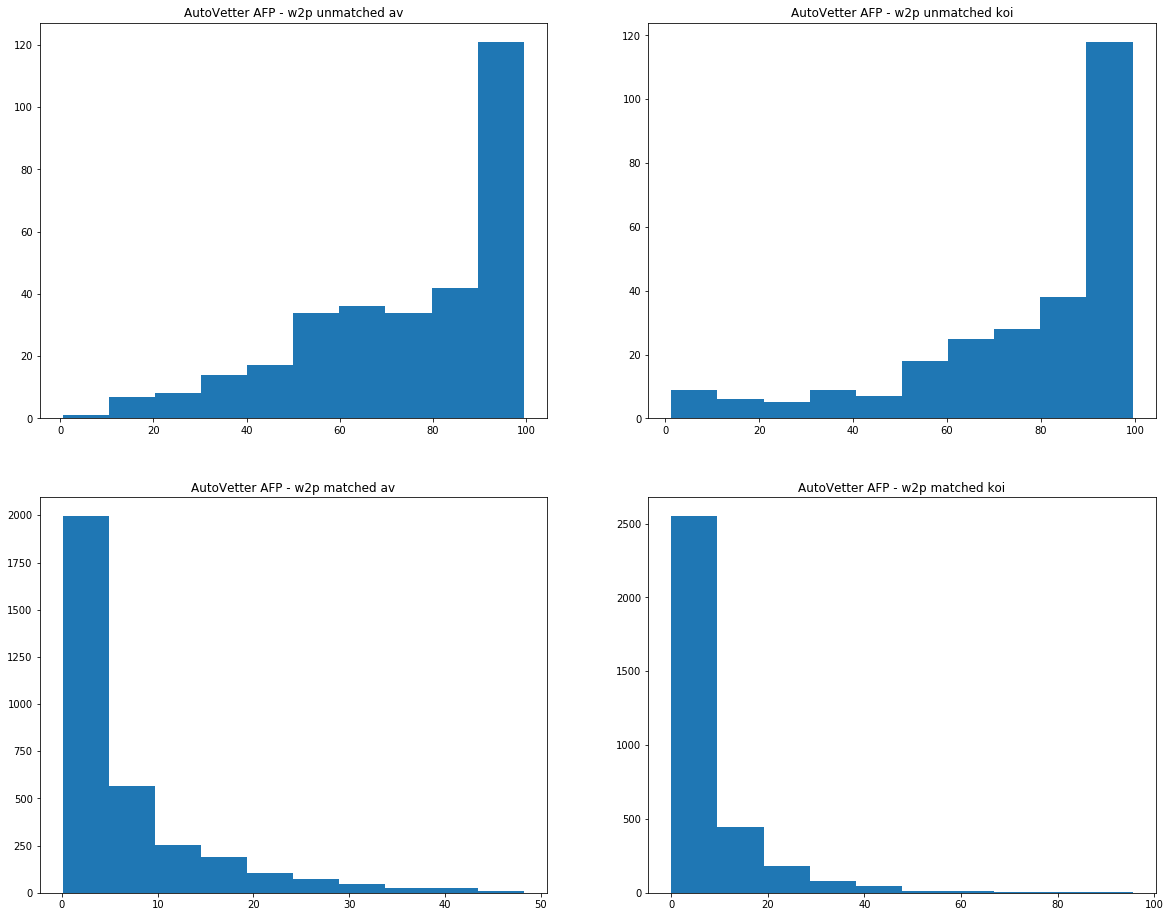

In [33]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(diff_df.av_vf_afp)
axs[0, 0].set_title('AutoVetter AFP - w2p unmatched av')
axs[0, 1].hist(diff2_df.av_vf_afp)
axs[0, 1].set_title('AutoVetter AFP - w2p unmatched koi')

axs[1, 0].hist(nodiff_df.av_vf_afp)
axs[1, 0].set_title('AutoVetter AFP - w2p matched av')
axs[1, 1].hist(nodiff2_df.av_vf_afp)
axs[1, 1].set_title('AutoVetter AFP - w2p matched koi')

plt.show()

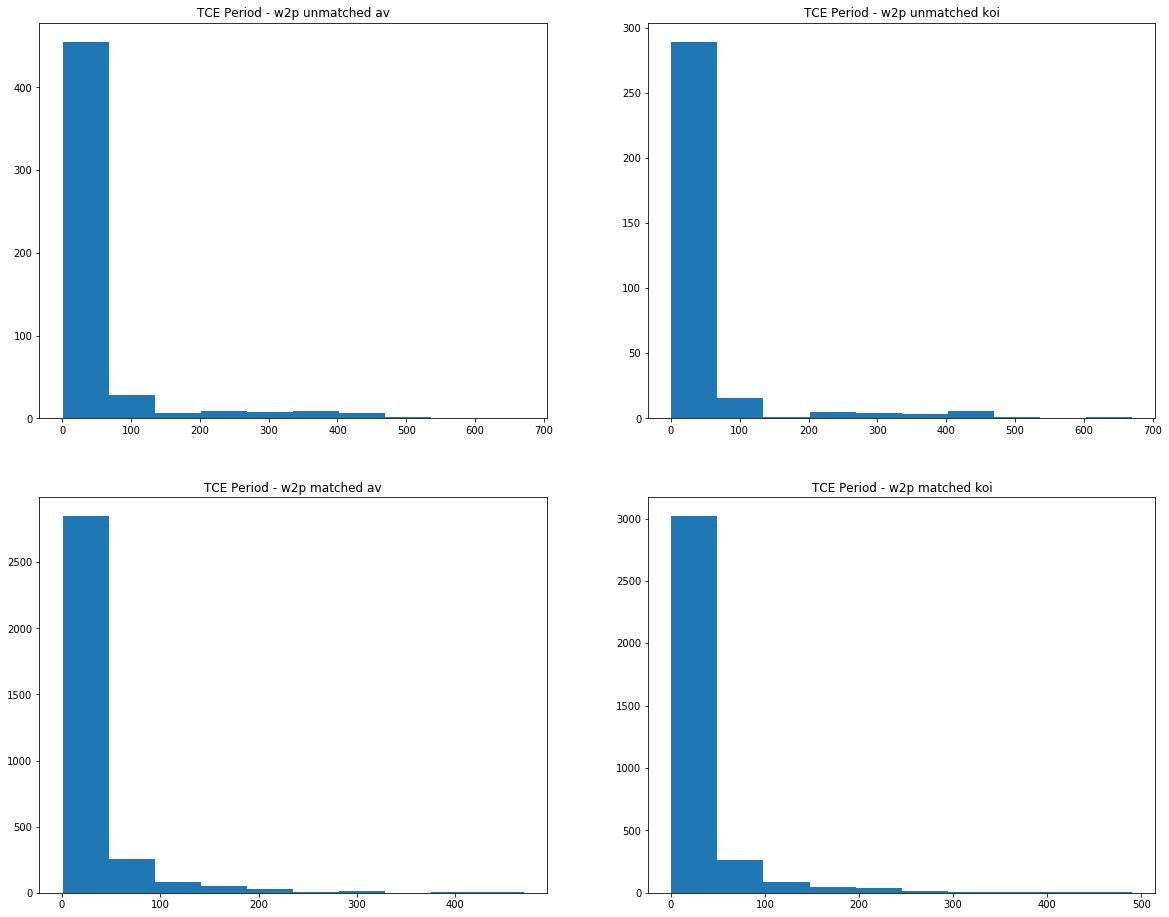

In [35]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(diff_df.tce_period)
axs[0, 0].set_title('TCE Period - w2p unmatched av')
axs[0, 1].hist(diff2_df.tce_period)
axs[0, 1].set_title('TCE Period - w2p unmatched koi')

axs[1, 0].hist(nodiff_df.tce_period)
axs[1, 0].set_title('TCE Period - w2p matched av')
axs[1, 1].hist(nodiff2_df.tce_period)
axs[1, 1].set_title('TCE Period - w2p matched koi')

plt.show()

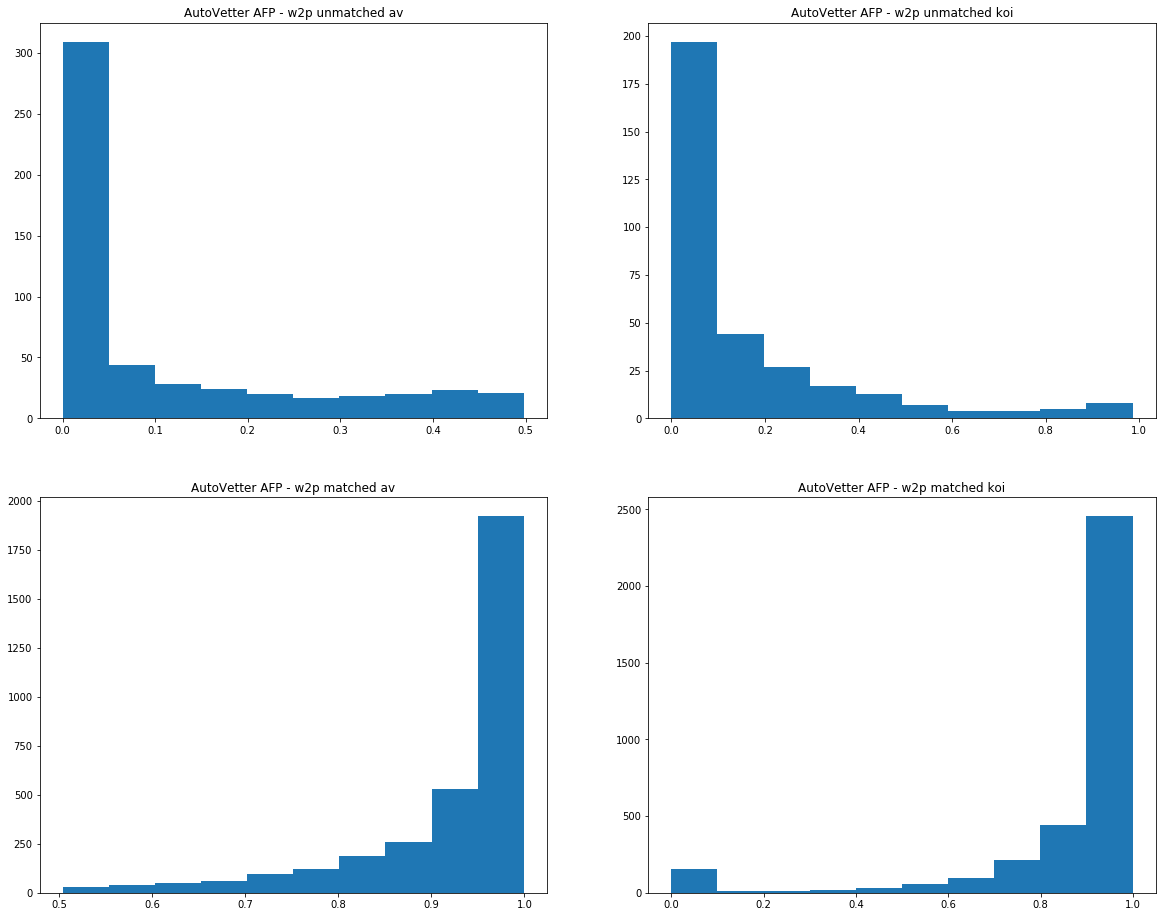

In [36]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(diff_df.av_vf_pc)
axs[0, 0].set_title('AutoVetter % - w2p unmatched av')
axs[0, 1].hist(diff2_df.av_vf_pc)
axs[0, 1].set_title('AutoVetter % - w2p unmatched koi')

axs[1, 0].hist(nodiff_df.av_vf_pc)
axs[1, 0].set_title('AutoVetter % - w2p matched av')
axs[1, 1].hist(nodiff2_df.av_vf_pc)
axs[1, 1].set_title('AutoVetter % - w2p matched koi')

plt.show()

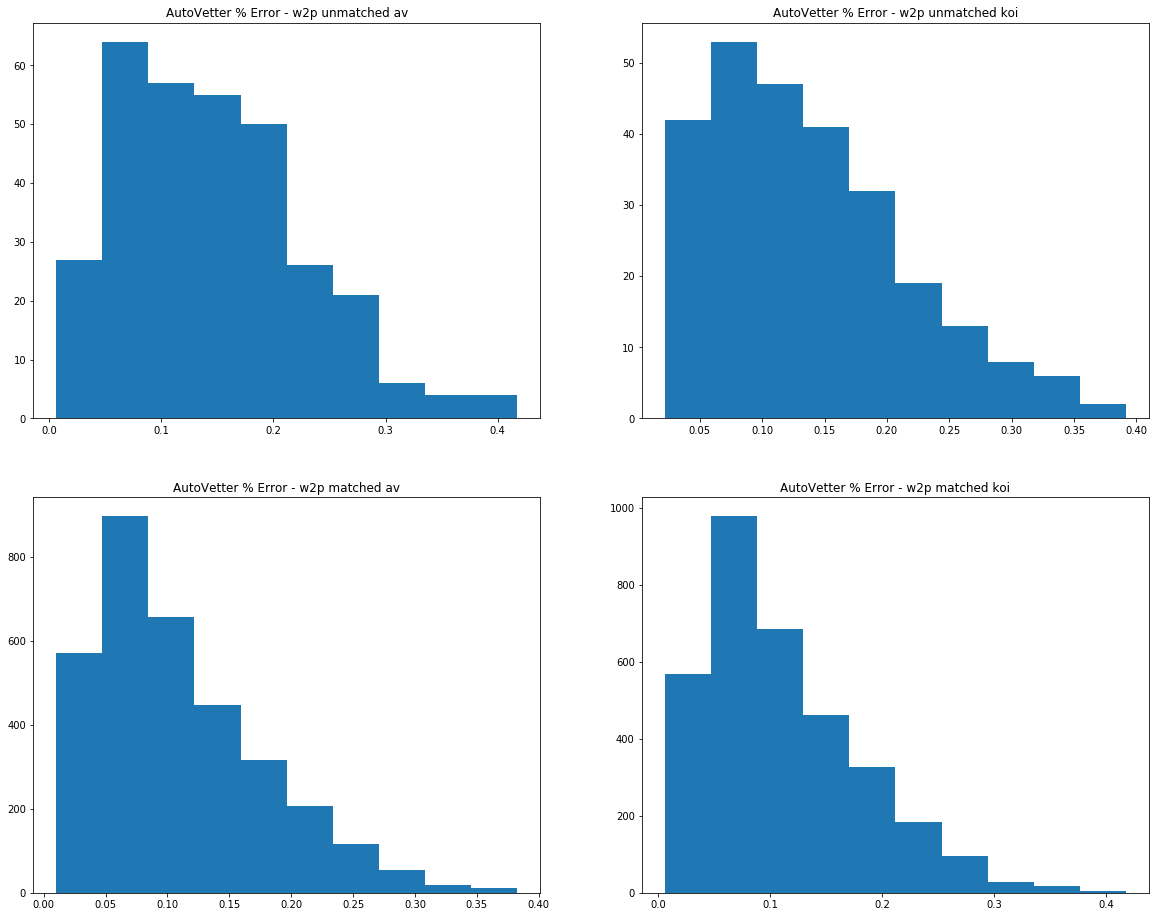

In [38]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(diff_df.av_vf_pc_err)
axs[0, 0].set_title('AutoVetter % Error - w2p unmatched av')
axs[0, 1].hist(diff2_df.av_vf_pc_err)
axs[0, 1].set_title('AutoVetter % Error - w2p unmatched koi')

axs[1, 0].hist(nodiff_df.av_vf_pc_err)
axs[1, 0].set_title('AutoVetter % Error - w2p matched av')
axs[1, 1].hist(nodiff2_df.av_vf_pc_err)
axs[1, 1].set_title('AutoVetter % Error - w2p matched koi')

plt.show()